In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
df= pd.read_csv('data/cleaned-complaints.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   complaint_id                  565874 non-null  int64 
 1   submitted_via                 565874 non-null  object
 2   date_received                 565874 non-null  object
 3   date_sent_to_company          565874 non-null  object
 4   timely_response               565874 non-null  object
 5   year                          565874 non-null  int64 
 6   product                       565874 non-null  object
 7   sub_product                   378745 non-null  object
 8   issue                         565874 non-null  object
 9   sub_issue                     233262 non-null  object
 10  company                       565874 non-null  object
 11  state                         565874 non-null  object
 12  consumer_consent_provided     214561 non-null  object
 13 

In [5]:
df.columns

Index(['complaint_id', 'submitted_via', 'date_received',
       'date_sent_to_company', 'timely_response', 'year', 'product',
       'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer',
       'consumer_disputed'],
      dtype='object')

In [6]:
df['date_received']= df['date_received'].astype('datetime64[ns]')
df['date_sent_to_company']= df['date_sent_to_company'].astype('datetime64[ns]')

df['product']= df['product'].astype('category')
df['sub_product']= df['sub_product'].astype('category')
df['issue']= df['issue'].astype('category')
df['sub_issue']= df['sub_issue'].astype('category')
df['company']= df['company'].astype('category')
df['state']= df['state'].astype('category')

df['submitted_via']= df['submitted_via'].astype('category')
df['timely_response']= df['timely_response'].astype('category')
df['consumer_consent_provided']= df['consumer_consent_provided'].astype('category')
df['company_response_to_consumer']= df['company_response_to_consumer'].astype('category')
df['consumer_disputed']= df['consumer_disputed'].astype('category')
df['date_sent_to_company']= df['date_sent_to_company'].astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   complaint_id                  565874 non-null  int64         
 1   submitted_via                 565874 non-null  category      
 2   date_received                 565874 non-null  datetime64[ns]
 3   date_sent_to_company          565874 non-null  datetime64[ns]
 4   timely_response               565874 non-null  category      
 5   year                          565874 non-null  int64         
 6   product                       565874 non-null  category      
 7   sub_product                   378745 non-null  category      
 8   issue                         565874 non-null  category      
 9   sub_issue                     233262 non-null  category      
 10  company                       565874 non-null  category      
 11  state        

# Label Encoding

In [7]:
df.isna().sum()

complaint_id                         0
submitted_via                        0
date_received                        0
date_sent_to_company                 0
timely_response                      0
year                                 0
product                              0
sub_product                     187129
issue                                0
sub_issue                       332612
company                              0
state                                0
consumer_consent_provided       351313
company_response_to_consumer         0
consumer_disputed                    0
dtype: int64

In [8]:
for i in df.columns:
    print(df[i].value_counts())

1623836    1
2001105    1
996583     1
1281104    1
2155405    1
          ..
1561515    1
226065     1
2108064    1
1189967    1
2009169    1
Name: complaint_id, Length: 565874, dtype: int64
Web            389628
Referral        91990
Postal mail     37930
Phone           37838
Fax              8341
Email             147
Name: submitted_via, dtype: int64
2015-08-27    887
2015-08-26    855
2014-06-26    853
2016-07-06    834
2016-09-20    825
             ... 
2013-10-13     46
2013-05-19     41
2014-07-13     41
2013-02-23     32
2014-03-09      4
Name: date_received, Length: 1461, dtype: int64
2015-11-13    1049
2016-09-20     928
2014-01-13     847
2014-03-12     839
2016-12-13     836
              ... 
2017-04-02       1
2017-04-04       1
2017-03-31       1
2017-03-13       1
2017-03-22       1
Name: date_sent_to_company, Length: 1541, dtype: int64
Yes    557930
No       7944
Name: timely_response, dtype: int64
2016    171841
2015    151646
2014    139647
2013    102740
Name: ye

In [9]:
df.columns

Index(['complaint_id', 'submitted_via', 'date_received',
       'date_sent_to_company', 'timely_response', 'year', 'product',
       'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer',
       'consumer_disputed'],
      dtype='object')

In [10]:
i='a'
i+'_le'

'a_le'

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

mask_lef= ['sub_product', 'sub_issue', 'consumer_consent_provided']
lef= ['product', 'issue', 'company_response_to_consumer', 'consumer_disputed', 'state', 'timely_response', 'submitted_via']

# Label encode the columns
for i in lef:
    df[i+'_le']= le.fit_transform(df[i].astype(str))

df.head()

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,consumer_consent_provided,company_response_to_consumer,consumer_disputed,product_le,issue_le,company_response_to_consumer_le,consumer_disputed_le,state_le,timely_response_le,submitted_via_le
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,Consent provided,Closed,Yes,4,25,0,1,23,1,5
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,Consent not provided,Closed with explanation,No,0,63,1,0,33,1,5
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,NaN,Closed with explanation,No,2,68,1,0,29,1,5
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,NaN,Closed with explanation,Yes,6,59,1,1,34,1,5
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,NaN,Closed with monetary relief,No,2,54,2,0,33,1,5


In [12]:
df.head()

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,consumer_consent_provided,company_response_to_consumer,consumer_disputed,product_le,issue_le,company_response_to_consumer_le,consumer_disputed_le,state_le,timely_response_le,submitted_via_le
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,Consent provided,Closed,Yes,4,25,0,1,23,1,5
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,Consent not provided,Closed with explanation,No,0,63,1,0,33,1,5
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,NaN,Closed with explanation,No,2,68,1,0,29,1,5
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,NaN,Closed with explanation,Yes,6,59,1,1,34,1,5
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,NaN,Closed with monetary relief,No,2,54,2,0,33,1,5


In [13]:
for i in mask_lef:
    df[i+'_le']= le.fit_transform(df[i].astype(str))

In [14]:
df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
year                                    0
product                                 0
sub_product                        187129
issue                                   0
sub_issue                          332612
company                                 0
state                                   0
consumer_consent_provided          351313
company_response_to_consumer            0
consumer_disputed                       0
product_le                              0
issue_le                                0
company_response_to_consumer_le         0
consumer_disputed_le                    0
state_le                                0
timely_response_le                      0
submitted_via_le                        0
sub_product_le                          0
sub_issue_le                      

In [15]:
df[(df['sub_issue'].isna())][['sub_issue', 'sub_issue_le']]

,sub_issue,sub_issue_le
1,NaN,58
2,NaN,58
3,NaN,58
4,NaN,58
5,NaN,58
...,...,...
565867,NaN,58
565868,NaN,58
565869,NaN,58
565872,NaN,58


In [16]:
df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
year                                    0
product                                 0
sub_product                        187129
issue                                   0
sub_issue                          332612
company                                 0
state                                   0
consumer_consent_provided          351313
company_response_to_consumer            0
consumer_disputed                       0
product_le                              0
issue_le                                0
company_response_to_consumer_le         0
consumer_disputed_le                    0
state_le                                0
timely_response_le                      0
submitted_via_le                        0
sub_product_le                          0
sub_issue_le                      

In [17]:
for i in mask_lef:
    df.loc[df[i].isna(), i+'_le'] = np.nan

df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
year                                    0
product                                 0
sub_product                        187129
issue                                   0
sub_issue                          332612
company                                 0
state                                   0
consumer_consent_provided          351313
company_response_to_consumer            0
consumer_disputed                       0
product_le                              0
issue_le                                0
company_response_to_consumer_le         0
consumer_disputed_le                    0
state_le                                0
timely_response_le                      0
submitted_via_le                        0
sub_product_le                     187129
sub_issue_le                      

# Count category encoding

In [18]:
import category_encoders as ce
# Create CountEncoder object
ce_count = ce.CountEncoder()

# Perform count encoding on 'company' column
df['company_ce'] = ce_count.fit_transform(df['company'])

df[['company', 'company_ce']]

c:\Users\31405.ISBDOMAIN1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,company,company_ce
0,Hillcrest Davidson & Associates,136
1,HSBC NORTH AMERICA HOLDINGS INC.,5519
2,CAPITAL ONE FINANCIAL CORPORATION,14386
3,"HUNTINGTON NATIONAL BANK, THE",1049
4,AMERICAN EXPRESS COMPANY,6424
...,...,...
565869,U.S. BANCORP,9743
565870,Experian Information Solutions Inc.,39764
565871,"EQUIFAX, INC.",42088
565872,PNC Bank N.A.,6554


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   complaint_id                     565874 non-null  int64         
 1   submitted_via                    565874 non-null  category      
 2   date_received                    565874 non-null  datetime64[ns]
 3   date_sent_to_company             565874 non-null  datetime64[ns]
 4   timely_response                  565874 non-null  category      
 5   year                             565874 non-null  int64         
 6   product                          565874 non-null  category      
 7   sub_product                      378745 non-null  category      
 8   issue                            565874 non-null  category      
 9   sub_issue                        233262 non-null  category      
 10  company                          565874 non-

In [20]:
df['company_ce'].describe([0.20, 0.15, 0.10, 0.05, 0.03, 0.01])

count    565874.000000
mean      20348.784351
std       17300.946112
min          15.000000
1%          108.000000
3%          163.000000
5%          224.000000
10%         488.000000
15%         916.000000
20%        1424.000000
50%       14386.000000
max       45490.000000
Name: company_ce, dtype: float64

In [21]:
pd.DataFrame(df['company'].value_counts())

,company
"BANK OF AMERICA, NATIONAL ASSOCIATION",45490
"EQUIFAX, INC.",42088
WELLS FARGO & COMPANY,39959
Experian Information Solutions Inc.,39764
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",34163
...,...
FIRST AMERICAN FINANCIAL CORPORATION,85
"Delray Capital, LLC",82
Global Recovery Group,71
FIRSTBANK PUERTO RICO,46


In [22]:
df= df[df['company_ce']>=90]
df.reset_index(inplace=True, drop=True)
df.shape

(565135, 26)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565135 entries, 0 to 565134
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   complaint_id                     565135 non-null  int64         
 1   submitted_via                    565135 non-null  category      
 2   date_received                    565135 non-null  datetime64[ns]
 3   date_sent_to_company             565135 non-null  datetime64[ns]
 4   timely_response                  565135 non-null  category      
 5   year                             565135 non-null  int64         
 6   product                          565135 non-null  category      
 7   sub_product                      378038 non-null  category      
 8   issue                            565135 non-null  category      
 9   sub_issue                        232935 non-null  category      
 10  company                          565135 non-

# Feature extraction

In [24]:
df['lag_submit_to_send']= df['date_sent_to_company'] - df['date_received']
df['lag_submit_to_send'].value_counts()

0 days      283410
1 days       58151
2 days       42508
3 days       32775
4 days       31949
             ...  
520 days         1
314 days         1
340 days         1
312 days         1
315 days         1
Name: lag_submit_to_send, Length: 399, dtype: int64

In [25]:
df['lag_submit_to_send']= df['lag_submit_to_send'].dt.days

In [26]:
df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,company_response_to_consumer_le,consumer_disputed_le,state_le,timely_response_le,submitted_via_le,sub_product_le,sub_issue_le,consumer_consent_provided_le,company_ce,lag_submit_to_send
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,0,1,23,1,5,20.0,20.0,1.0,136,2
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,1,0,33,1,5,30.0,NaN,0.0,5519,0
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,1,0,29,1,5,NaN,NaN,NaN,14386,0
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,1,1,34,1,5,31.0,NaN,NaN,1049,5
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,2,0,33,1,5,NaN,NaN,NaN,6424,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565130,740648,Web,2014-03-03,2014-03-03,Yes,2014,Credit card,NaN,Payoff process,NaN,...,3,0,4,1,5,NaN,NaN,NaN,9743,0
565131,657754,Postal mail,2014-01-07,2014-01-27,Yes,2014,Credit reporting,NaN,Incorrect information on credit report,Account status,...,1,0,42,1,3,NaN,0.0,NaN,39764,20
565132,1887015,Web,2016-04-19,2016-04-19,Yes,2016,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,...,1,0,4,1,5,NaN,26.0,3.0,42088,0
565133,2018364,Web,2016-07-19,2016-07-19,Yes,2016,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,0,0,42,1,5,6.0,NaN,1.0,6554,0


In [27]:
df['lag_submit_to_send'].describe()

count    565135.000000
mean          3.823012
std          15.821537
min          -1.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        1613.000000
Name: lag_submit_to_send, dtype: float64

In [28]:
df.shape

(565135, 27)

In [29]:
df= df[df['lag_submit_to_send']>=0]
df.shape

(558723, 27)

In [30]:
df.reset_index(inplace=True, drop=True)

In [31]:
df['lag_submit_to_send'].describe()

count    558723.000000
mean          3.878362
std          15.903577
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        1613.000000
Name: lag_submit_to_send, dtype: float64

In [32]:
df['lag_submit_to_send'].value_counts()

0       283410
1        58151
2        42508
3        32775
4        31949
         ...  
588          1
783          1
334          1
1613         1
315          1
Name: lag_submit_to_send, Length: 398, dtype: int64

# seasonal fe

In [33]:
df['month']= df['date_received'].dt.month
df['week']= df['date_received'].dt.week
df['day']= df['date_received'].dt.day_of_week

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_42572\951655708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['date_received'].dt.month
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_42572\951655708.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']= df['date_received'].dt.week
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_42572\951655708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [36]:
df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,timely_response_le,submitted_via_le,sub_product_le,sub_issue_le,consumer_consent_provided_le,company_ce,lag_submit_to_send,month,week,day
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,1,5,20.0,20.0,1.0,136,2,10,44,0
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,1,5,30.0,NaN,0.0,5519,0,7,27,4
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,1,5,NaN,NaN,NaN,14386,0,9,39,0
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,1,5,31.0,NaN,NaN,1049,5,3,11,2
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,1,5,NaN,NaN,NaN,6424,0,5,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558718,740648,Web,2014-03-03,2014-03-03,Yes,2014,Credit card,NaN,Payoff process,NaN,...,1,5,NaN,NaN,NaN,9743,0,3,10,0
558719,657754,Postal mail,2014-01-07,2014-01-27,Yes,2014,Credit reporting,NaN,Incorrect information on credit report,Account status,...,1,3,NaN,0.0,NaN,39764,20,1,2,1
558720,1887015,Web,2016-04-19,2016-04-19,Yes,2016,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,...,1,5,NaN,26.0,3.0,42088,0,4,16,1
558721,2018364,Web,2016-07-19,2016-07-19,Yes,2016,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,1,5,6.0,NaN,1.0,6554,0,7,29,1


# Scale, transform

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['lag_submit_to_send_mms']  = scaler.fit_transform(df[['lag_submit_to_send']])
df['lag_submit_to_send_mms'].describe()


C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_42572\1485514606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_submit_to_send_mms']  = scaler.fit_transform(df[['lag_submit_to_send']])


count    558723.000000
mean          0.002404
std           0.009860
min           0.000000
25%           0.000000
50%           0.000000
75%           0.002480
max           1.000000
Name: lag_submit_to_send_mms, dtype: float64

In [38]:
df['company_ce'].describe()

count    558723.000000
mean      20363.833112
std       17301.387502
min          90.000000
25%        2509.000000
50%       14386.000000
75%       39764.000000
max       45490.000000
Name: company_ce, dtype: float64

In [39]:
df['company_ce']  = scaler.fit_transform(df[['company_ce']])
df['company_ce'].describe()

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_42572\3434185719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_ce']  = scaler.fit_transform(df[['company_ce']])


count    558723.000000
mean          0.446560
std           0.381088
min           0.000000
25%           0.053282
50%           0.314890
75%           0.873877
max           1.000000
Name: company_ce, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558723 entries, 0 to 558722
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   complaint_id                     558723 non-null  int64         
 1   submitted_via                    558723 non-null  category      
 2   date_received                    558723 non-null  datetime64[ns]
 3   date_sent_to_company             558723 non-null  datetime64[ns]
 4   timely_response                  558723 non-null  category      
 5   year                             558723 non-null  int64         
 6   product                          558723 non-null  category      
 7   sub_product                      374308 non-null  category      
 8   issue                            558723 non-null  category      
 9   sub_issue                        229740 non-null  category      
 10  company                          558723 non-

In [41]:
df.columns

Index(['complaint_id', 'submitted_via', 'date_received',
       'date_sent_to_company', 'timely_response', 'year', 'product',
       'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer',
       'consumer_disputed', 'product_le', 'issue_le',
       'company_response_to_consumer_le', 'consumer_disputed_le', 'state_le',
       'timely_response_le', 'submitted_via_le', 'sub_product_le',
       'sub_issue_le', 'consumer_consent_provided_le', 'company_ce',
       'lag_submit_to_send', 'month', 'week', 'day', 'lag_submit_to_send_mms'],
      dtype='object')

In [42]:
df[['company_response_to_consumer',
       'consumer_disputed']].value_counts().sort_index()

company_response_to_consumer     consumer_disputed
Closed                           No                     8388
                                 Yes                    2316
Closed with explanation          No                   341154
                                 Yes                   94478
Closed with monetary relief      No                    33647
                                 Yes                    4101
Closed with non-monetary relief  No                    66100
                                 Yes                    8539
dtype: int64

In [43]:
df= df[['complaint_id', 'submitted_via', 'date_received', 'date_sent_to_company', 'timely_response', 'lag_submit_to_send',
        'year', 'month', 'week', 'day',
       'product', 'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer', 'consumer_disputed', 

       'submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 
       'company_ce', 'state_le', 
       'company_response_to_consumer_le', 'consumer_consent_provided_le', 'consumer_disputed_le', 
        ]]

df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,lag_submit_to_send,year,month,week,day,...,lag_submit_to_send_mms,product_le,sub_product_le,issue_le,sub_issue_le,company_ce,state_le,company_response_to_consumer_le,consumer_consent_provided_le,consumer_disputed_le
0,1623836,Web,2015-10-26,2015-10-28,Yes,2,2015,10,44,0,...,0.001240,4,20.0,25,20.0,0.001013,23,0,1.0,1
1,2004883,Web,2016-07-08,2016-07-08,Yes,0,2016,7,27,4,...,0.000000,0,30.0,63,NaN,0.119581,33,1,0.0,0
2,1038897,Web,2014-09-22,2014-09-22,Yes,0,2014,9,39,0,...,0.000000,2,NaN,68,NaN,0.314890,29,1,NaN,0
3,353552,Web,2013-03-13,2013-03-18,Yes,5,2013,3,11,2,...,0.003100,6,31.0,59,NaN,0.021123,34,1,NaN,1
4,405371,Web,2013-05-13,2013-05-13,Yes,0,2013,5,20,0,...,0.000000,2,NaN,54,NaN,0.139515,33,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558718,740648,Web,2014-03-03,2014-03-03,Yes,0,2014,3,10,0,...,0.000000,2,NaN,75,NaN,0.212621,4,3,NaN,0
558719,657754,Postal mail,2014-01-07,2014-01-27,Yes,20,2014,1,2,1,...,0.012399,3,NaN,52,0.0,0.873877,42,1,NaN,0
558720,1887015,Web,2016-04-19,2016-04-19,Yes,0,2016,4,16,1,...,0.000000,3,NaN,52,26.0,0.925066,4,1,3.0,0
558721,2018364,Web,2016-07-19,2016-07-19,Yes,0,2016,7,29,1,...,0.000000,6,6.0,59,NaN,0.142379,42,0,1.0,0


In [47]:
dfm= df[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le', 'company_response_to_consumer_le']]

dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558723 entries, 0 to 558722
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   submitted_via_le                 558723 non-null  int32  
 1   timely_response_le               558723 non-null  int32  
 2   lag_submit_to_send_mms           558723 non-null  float64
 3   year                             558723 non-null  int64  
 4   month                            558723 non-null  int64  
 5   week                             558723 non-null  int64  
 6   day                              558723 non-null  int64  
 7   product_le                       558723 non-null  int32  
 8   sub_product_le                   374308 non-null  float64
 9   issue_le                         558723 non-null  int32  
 10  sub_issue_le                     229740 non-null  float64
 11  company_ce                       558723 non-null  float64
 12  st

In [51]:
dfm.isna().sum()

submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
year                                    0
month                                   0
week                                    0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
dtype: int64

In [52]:
dff= dfm.fillna(-1)
dff.isna().sum()

submitted_via_le                   0
timely_response_le                 0
lag_submit_to_send_mms             0
year                               0
month                              0
week                               0
day                                0
product_le                         0
sub_product_le                     0
issue_le                           0
sub_issue_le                       0
company_ce                         0
state_le                           0
consumer_consent_provided_le       0
company_response_to_consumer_le    0
dtype: int64

# Feature Selection

# ANOVA

Feature 0: 283.634896
Feature 1: 925.433843
Feature 2: 146.724418
Feature 3: 259.898412
Feature 4: 33.948242
Feature 5: 32.586275
Feature 6: 44.731244
Feature 7: 8042.465193
Feature 8: 4403.305453
Feature 9: 496.129893
Feature 10: 8749.036512
Feature 11: 3219.258009
Feature 12: 49.696167
Feature 13: 35.255059


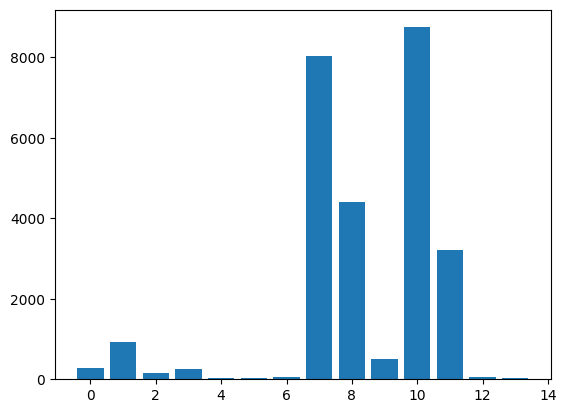

In [54]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = dff[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = dff['company_response_to_consumer_le']

# Apply ANOVA feature selection
fs_anova = SelectKBest(score_func=f_classif, k='all')
X_selected = fs_anova.fit_transform(X, y)

# Print scores and selected features
for i in range(len(fs_anova.scores_)):
    print('Feature %d: %f' % (i, fs_anova.scores_[i]))
    
# Plot scores
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fs_anova.scores_))], fs_anova.scores_)
plt.show()

# chi2 is bad if we fill na by -1. the value we use to fill na impacts feature importance

Feature 0: 186.037310
Feature 1: 38.660879
Feature 2: 17.782421
Feature 3: 0.455701
Feature 4: 179.086468
Feature 5: 800.360020
Feature 6: 159.480986
Feature 7: 32697.494476
Feature 8: 182645.669156
Feature 9: 15276.142279
Feature 10: 588617.656432
Feature 11: 3087.497648
Feature 12: 1497.093830
Feature 13: 206.733684


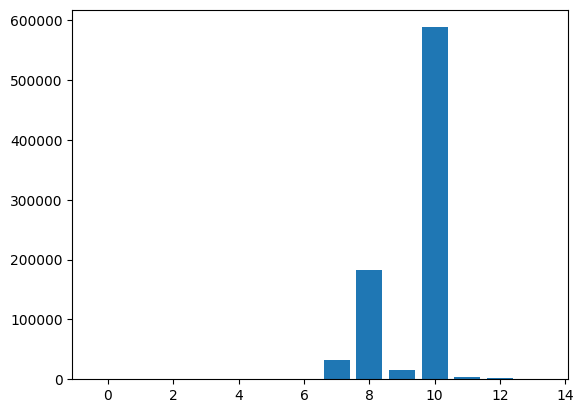

In [64]:
from sklearn.feature_selection import chi2

dfnf= dfm.fillna(0.1)


X = dfnf[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = dfnf['company_response_to_consumer_le']

# Apply chi-squared feature selection
fs_chi = SelectKBest(score_func=chi2, k='all')
X_selected = fs_chi.fit_transform(X, y)

# Print scores and selected features
for i in range(len(fs_chi.scores_)):
    print('Feature %d: %f' % (i, fs_chi.scores_[i]))
    
# Plot scores
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fs_chi.scores_))], fs_chi.scores_)
plt.show()

Feature 0: 186.037310
Feature 1: 38.660879
Feature 2: 17.782421
Feature 3: 0.455701
Feature 4: 179.086468
Feature 5: 800.360020
Feature 6: 159.480986
Feature 7: 32697.494476
Feature 8: 13159015.424027
Feature 9: 15276.142279
Feature 10: 16732515.213538
Feature 11: 3087.497648
Feature 12: 1497.093830
Feature 13: 148833.876900


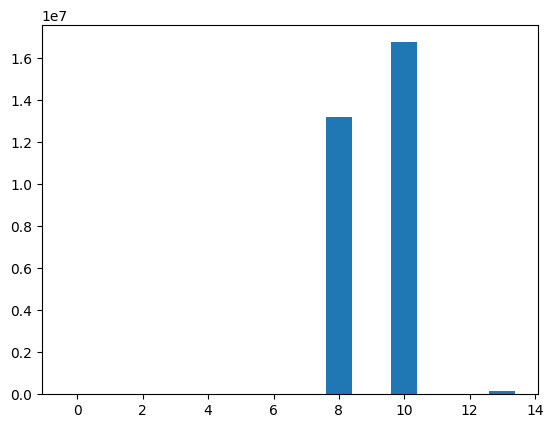

In [65]:
dfnf= dfm.fillna(1000)


X = dfnf[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = dfnf['company_response_to_consumer_le']

# Apply chi-squared feature selection
fs_chi = SelectKBest(score_func=chi2, k='all')
X_selected = fs_chi.fit_transform(X, y)

# Print scores and selected features
for i in range(len(fs_chi.scores_)):
    print('Feature %d: %f' % (i, fs_chi.scores_[i]))
    
# Plot scores
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fs_chi.scores_))], fs_chi.scores_)
plt.show()

# LASSO

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load data and split into training and testing sets
X = dff[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = dff['company_response_to_consumer_le']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Fit Lasso Regression model with cross-validation
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Evaluate model on test set
lasso_best = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_best.fit(X_train, y_train)
score = lasso_best.score(X_test, y_test)
print('Test set score:', score)

Best hyperparameters: {'alpha': 0.001}
Test set score: 0.04806439402771634


In [78]:
# Fit Lasso Regression model
lasso = Lasso(alpha=0.001)  # adjust alpha to control regularization strength
lasso.fit(X, y)

# Print coefficients and selected features
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print('Feature %d: %f' % (i, lasso.coef_[i]))

Feature 0: 0.016915
Feature 1: 0.114626
Feature 3: -0.018741
Feature 4: -0.003027
Feature 6: 0.002093
Feature 7: -0.033108
Feature 8: -0.004389
Feature 9: 0.000038
Feature 10: 0.005290
Feature 11: 0.103725
Feature 12: 0.000544
Feature 13: -0.004837


In [79]:
# Print the selected features
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef!=0].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['submitted_via_le', 'timely_response_le', 'year', 'month', 'day', 'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 'consumer_consent_provided_le']


In [80]:
len(selected_features)

12

In [82]:
X.columns.difference(selected_features)

Index(['lag_submit_to_send_mms', 'week'], dtype='object')

In [84]:
import statsmodels.api as sm


# Load data and split into training and testing sets
X = dff[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']].fillna(-1)
y = dff['company_response_to_consumer_le']
# Add an intercept term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model to the data
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     company_response_to_consumer_le   R-squared:                       0.048
Model:                                         OLS   Adj. R-squared:                  0.048
Method:                              Least Squares   F-statistic:                     2014.
Date:                             Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                                     11:42:01   Log-Likelihood:            -5.9715e+05
No. Observations:                           558723   AIC:                         1.194e+06
Df Residuals:                               558708   BIC:                         1.195e+06
Df Model:                                       14                                         
Covariance Type:                         nonrobust                                         
                                   coef    std err          t      P>|t|      [0

# PCA

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corr with missing filled as -1

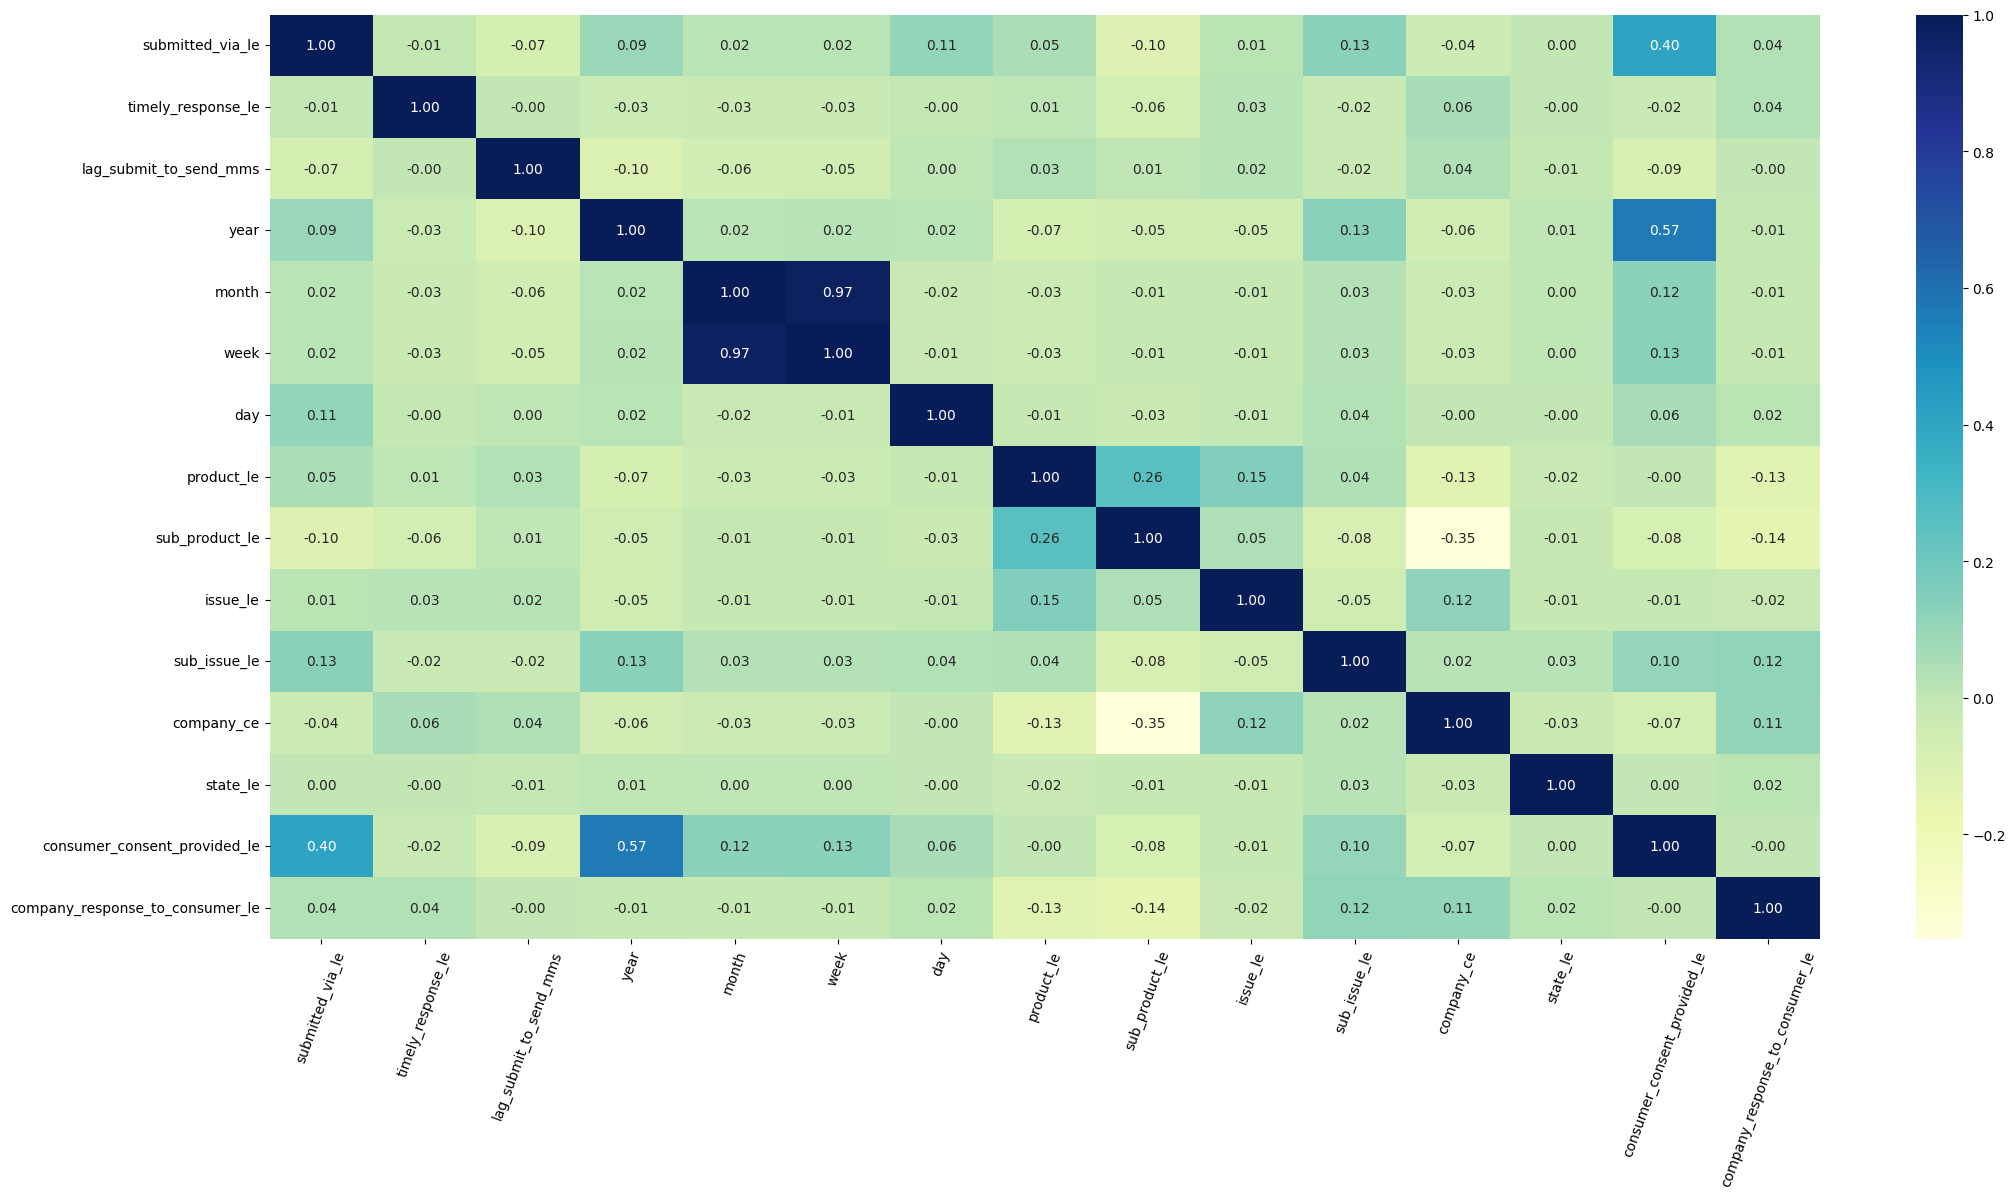

In [87]:
fig, ax = plt.subplots(figsize=(25,12))

hm= sns.heatmap(dff.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

# CORR with missing

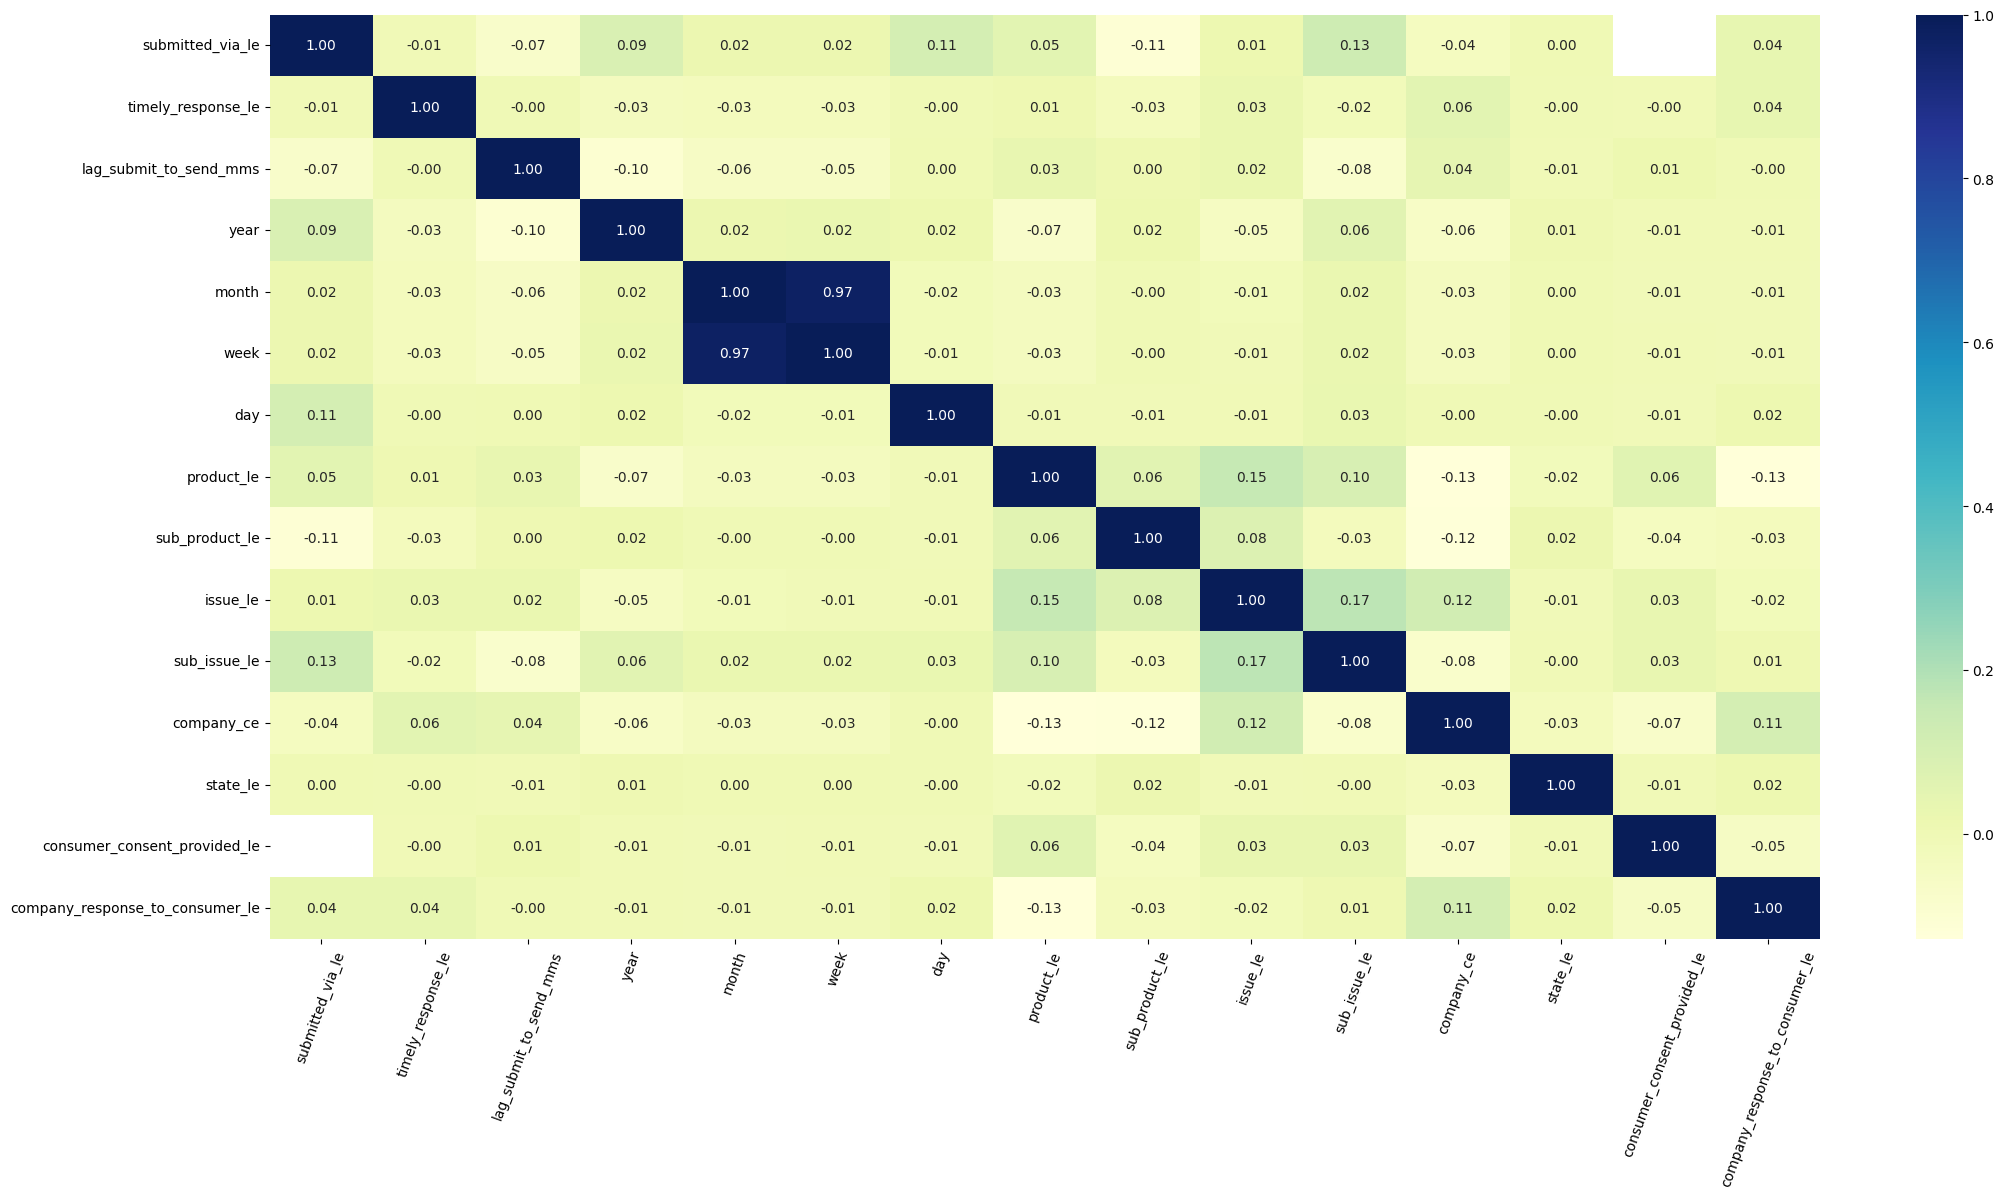

In [88]:
fig, ax = plt.subplots(figsize=(25,12))

hm= sns.heatmap(dfm.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [89]:
dfm.isna().sum()

submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
year                                    0
month                                   0
week                                    0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
dtype: int64

In [90]:
dff.isna().sum()

submitted_via_le                   0
timely_response_le                 0
lag_submit_to_send_mms             0
year                               0
month                              0
week                               0
day                                0
product_le                         0
sub_product_le                     0
issue_le                           0
sub_issue_le                       0
company_ce                         0
state_le                           0
consumer_consent_provided_le       0
company_response_to_consumer_le    0
dtype: int64

In [91]:
X = dff[['submitted_via_le', 'timely_response_le',
       'year', 'month', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = dff['company_response_to_consumer_le']

In [92]:
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Fit and transform the correlation matrix
pca.fit(dfm[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']].fillna(-1).corr())

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print(explained_variance_ratio.round(3))

[0.234 0.189 0.141 0.074 0.067 0.062 0.06  0.058 0.049 0.032 0.027 0.007
 0.    0.   ]


In [93]:
numbers = [0.234, 0.189, 0.141, 0.074, 0.067, 0.062, 0.06, 0.058, 0.049, 0.032, 0.027, 0.007, 0.0, 0.0]
sum(numbers[:10])

0.9660000000000003

In [94]:
sum(numbers[:9])

0.9340000000000003

In [96]:
len(numbers[:10])

10

In [95]:
len(['submitted_via_le', 'timely_response_le', 'year', 'month', 'day', 'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 'consumer_consent_provided_le'])

12

In [97]:
# Initialize PCA object with 2 components
pca = PCA(n_components=10)

In [104]:
reduced_data= pca.fit_transform(dff[['submitted_via_le', 'timely_response_le',
       'year', 'month', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']])
reduced_data

array([[-22.2415115 ,   6.28191727,  -0.24010947, ...,   1.26436157,
         -0.66773667,   0.71192389],
       [ 17.46053709, -11.07230077,  13.88581847, ...,   1.37306179,
         -0.07679117,  -0.518629  ],
       [ 20.75152559,  -1.5650692 ,   7.97503226, ...,  -0.45957069,
         -0.95135503,  -0.45300642],
       ...,
       [  3.28502072,  17.36050572, -21.31916904, ...,   3.01331549,
         -0.17444274,   1.98968115],
       [ 12.05431419,  -2.16203353,  21.1855983 , ...,   2.18395791,
          0.09075502,   0.2152314 ],
       [-45.75245429,  -8.34716495,  12.26670405, ...,   2.04441569,
         -0.28303087,   0.28996352]])

In [105]:
cols=[]
for i in range(1, 11):
    cols.append('PCA_'+str(i))

In [106]:
df_reduced = pd.DataFrame(reduced_data, columns=cols)
df_reduced

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-22.241512,6.281917,-0.240109,11.496849,-3.424009,0.224121,-2.177976,1.264362,-0.667737,0.711924
1,17.460537,-11.072301,13.885818,12.644152,-0.771938,-4.717472,1.871498,1.373062,-0.076791,-0.518629
2,20.751526,-1.565069,7.975032,-16.649587,-2.593437,-1.288961,-2.316230,-0.459571,-0.951355,-0.453006
3,13.644728,-11.648722,14.933200,13.978584,3.480597,1.274000,-0.277736,-0.992761,-1.346145,0.128747
4,6.764571,-2.106310,11.918402,-16.219963,1.446603,-1.160513,-2.384936,-1.075757,-1.495371,0.113864
...,...,...,...,...,...,...,...,...,...,...
558718,28.135005,-5.633517,-16.586154,-16.801317,3.359132,-1.684170,-2.365765,-0.279064,-0.984450,-0.325308
558719,4.581812,0.279604,20.586754,-15.813999,5.512724,-0.395878,-1.592255,-1.072004,0.830593,0.451265
558720,3.285021,17.360506,-21.319169,-7.208411,2.503280,-0.660497,-1.171255,3.013315,-0.174443,1.989681
558721,12.054314,-2.162034,21.185598,-9.627913,-0.519298,2.430366,-1.070659,2.183958,0.090755,0.215231


In [107]:
# Principal components correlation coefficients
loadings = pca.components_
loadings

array([[ 1.32239511e-04,  1.31250600e-04, -2.78548287e-03,
        -2.55594822e-03, -7.98839961e-04,  1.72082567e-02,
         5.77205691e-02,  9.95397266e-01, -7.26698910e-02,
         1.79672176e-03, -1.60218479e-02, -8.30567860e-04],
       [ 9.52654020e-03,  1.75018807e-05,  9.00474872e-03,
         7.16364676e-03,  4.37544430e-03, -2.91431337e-03,
        -3.17375726e-01,  8.90561948e-02,  9.25453237e-01,
         3.19115847e-03,  1.85941298e-01,  6.54237997e-03],
       [-1.99835487e-03, -8.34021147e-06, -1.60692326e-03,
        -6.37455860e-04, -1.16826999e-03, -2.14252513e-03,
         6.39111750e-02, -6.63110326e-04, -1.75350825e-01,
        -1.41182187e-03,  9.82420532e-01, -1.40666761e-03],
       [-3.70001549e-03, -5.93835294e-04,  2.88408579e-04,
         6.22559256e-04, -1.19057780e-03,  4.42248742e-02,
         9.43282665e-01, -3.15954956e-02,  3.27335097e-01,
        -9.24853027e-03, -2.88913361e-03, -2.37075616e-03],
       [-5.41129209e-03,  9.43787172e-04, -7.7985177

In [108]:
# Number of features before PCA
n_features = pca.n_features_
n_features

12

In [112]:
# Feature names before PCA
feature_names = ['submitted_via_le', 'timely_response_le',
       'year', 'month', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
feature_names,,,,,,,,,,
submitted_via_le,0.000132,0.009527,-0.001998,-0.003700,-0.005411,0.039984,0.104627,0.349918,-0.855963,-0.362815
timely_response_le,0.000131,0.000018,-0.000008,-0.000594,0.000944,0.001218,-0.000483,-0.002578,-0.000511,0.001651
year,-0.002785,0.009005,-0.001607,0.000288,-0.007799,-0.039290,0.038748,0.722425,0.499818,-0.474125
month,-0.002556,0.007164,-0.000637,0.000623,-0.998638,0.035382,0.007175,-0.028553,0.006703,-0.022080
day,-0.000799,0.004375,-0.001168,-0.001191,0.010257,-0.010660,0.991354,-0.105310,0.076689,0.002224
product_le,0.017208,-0.002914,-0.002143,0.044225,0.035673,0.996530,0.007170,0.009434,0.055247,-0.009739
sub_product_le,0.057721,-0.317376,0.063911,0.943283,-0.003574,-0.043323,0.003373,0.005938,-0.006733,0.000210
issue_le,0.995397,0.089056,-0.000663,-0.031595,-0.002498,-0.015486,0.000253,0.000983,0.001065,-0.000298
sub_issue_le,-0.072670,0.925453,-0.175351,0.327335,0.006996,-0.011110,-0.005574,-0.011975,0.001903,0.002886


In [111]:
df_reduced

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-22.241512,6.281917,-0.240109,11.496849,-3.424009,0.224121,-2.177976,1.264362,-0.667737,0.711924
1,17.460537,-11.072301,13.885818,12.644152,-0.771938,-4.717472,1.871498,1.373062,-0.076791,-0.518629
2,20.751526,-1.565069,7.975032,-16.649587,-2.593437,-1.288961,-2.316230,-0.459571,-0.951355,-0.453006
3,13.644728,-11.648722,14.933200,13.978584,3.480597,1.274000,-0.277736,-0.992761,-1.346145,0.128747
4,6.764571,-2.106310,11.918402,-16.219963,1.446603,-1.160513,-2.384936,-1.075757,-1.495371,0.113864
...,...,...,...,...,...,...,...,...,...,...
558718,28.135005,-5.633517,-16.586154,-16.801317,3.359132,-1.684170,-2.365765,-0.279064,-0.984450,-0.325308
558719,4.581812,0.279604,20.586754,-15.813999,5.512724,-0.395878,-1.592255,-1.072004,0.830593,0.451265
558720,3.285021,17.360506,-21.319169,-7.208411,2.503280,-0.660497,-1.171255,3.013315,-0.174443,1.989681
558721,12.054314,-2.162034,21.185598,-9.627913,-0.519298,2.430366,-1.070659,2.183958,0.090755,0.215231


In [113]:
df_reduced.isna().sum()

PCA_1     0
PCA_2     0
PCA_3     0
PCA_4     0
PCA_5     0
PCA_6     0
PCA_7     0
PCA_8     0
PCA_9     0
PCA_10    0
dtype: int64

In [114]:
dfm.isna().sum()

submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
year                                    0
month                                   0
week                                    0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
dtype: int64

In [115]:
final= pd.concat([dfm, df_reduced], axis=1)
final.isna().sum()

submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
year                                    0
month                                   0
week                                    0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
PCA_1                                   0
PCA_2                                   0
PCA_3                                   0
PCA_4                                   0
PCA_5                                   0
PCA_6                                   0
PCA_7                                   0
PCA_8                                   0
PCA_9                             

In [116]:
final.to_csv('data/transformed_complaints.csv', index=False)